## Negative ##

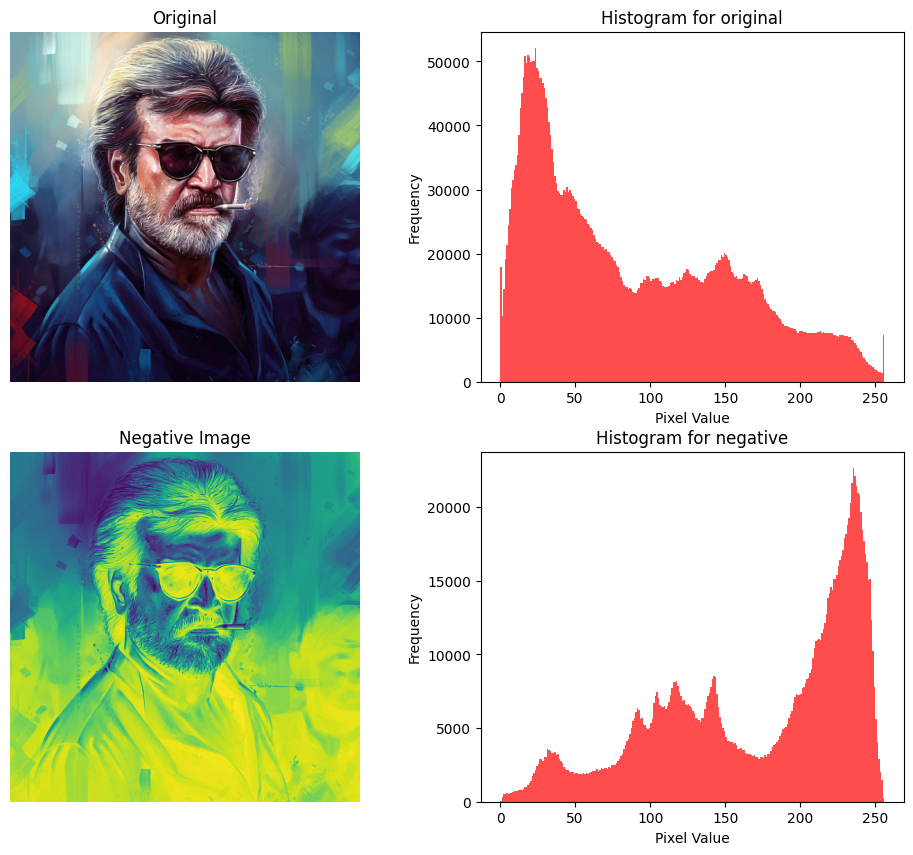

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
image = cv2.imread("E:/murugesan/Downloads/raaajo.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

negative_image = (256 -1) - image_gray

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.hist(image_rgb.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)

plt.title("Histogram for original")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis('off')
plt.subplot(2,2,4)
plt.hist(negative_image.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.title("Histogram for negative")
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

 

## Blur ##

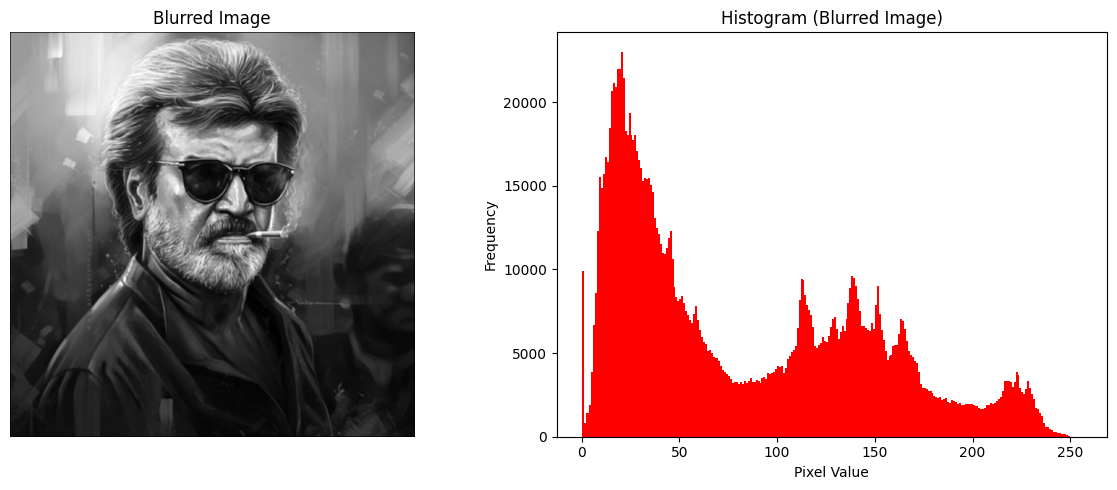

In [25]:
def box_blur(image_gray, kernel=5):
    h, w = image_gray.shape  
    blurred_image = np.zeros_like(image_gray, dtype=np.float32)  

    p = kernel // 2   

     
    for i in range(p, h - p):
        for j in range(p, w - p):
            neighbour = image_gray[i - p:i + p + 1, j - p:j + p + 1]   
            blurred_image[i, j] = np.mean(neighbour)   

    return np.clip(blurred_image, 0, 255).astype(np.uint8)  # Clip and convert to uint8

# Apply blur function
blurred_image = box_blur(image_gray, kernel=5)

# Display results
plt.figure(figsize=(12, 5))

# Blurred Image
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

# Histogram of Blurred Image
plt.subplot(1, 2, 2)
plt.hist(blurred_image.ravel(), bins=256, range=(0, 256), color='red')
plt.title('Histogram (Blurred Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Sharpened ##

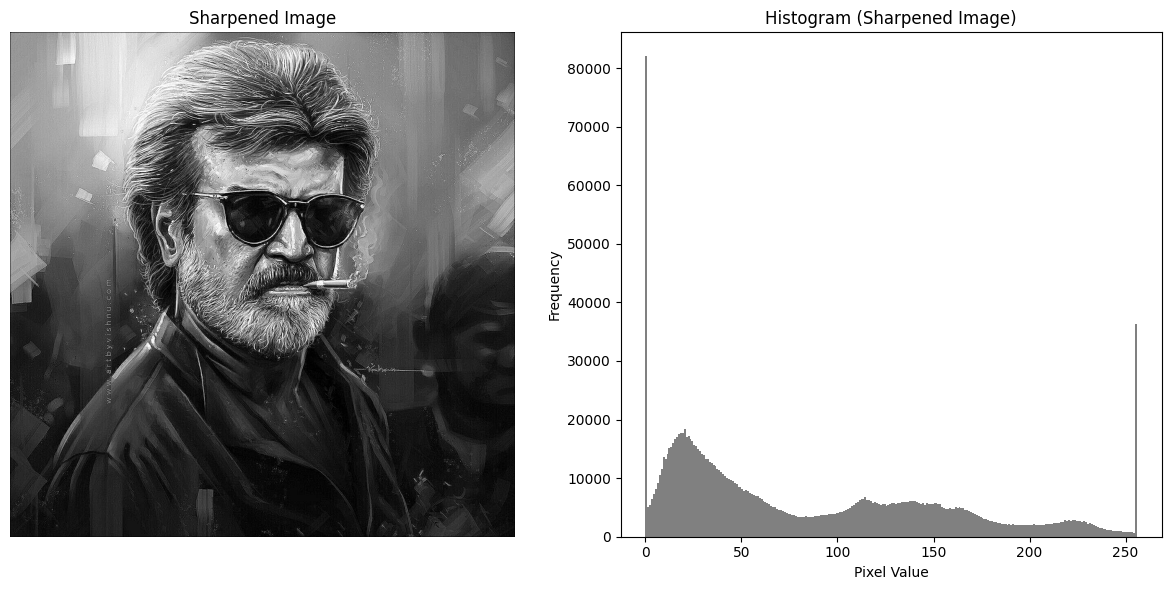

In [27]:
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

h, w = image_gray.shape

sharpened_image = np.zeros_like(image_gray, dtype=np.float32)

for i in range(1, h-1):
    for j in range(1, w-1):
          
            region = image_gray[i-1:i+2, j-1:j+2]   
            new_value = np.sum(region * kernel)   
            sharpened_image[i, j] = np.clip(new_value, 0, 255)   

 
sharpened_image = sharpened_image.astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sharpened_image,cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
 
plt.subplot(1, 2, 2)
plt.hist(sharpened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Sharpened Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Brightened ##

C:\Users\murugesan\AppData\Local\Temp\ipykernel_2828\3542034319.py:9: RuntimeWarning: overflow encountered in scalar add
  new_value = image_gray[i, j] + beta


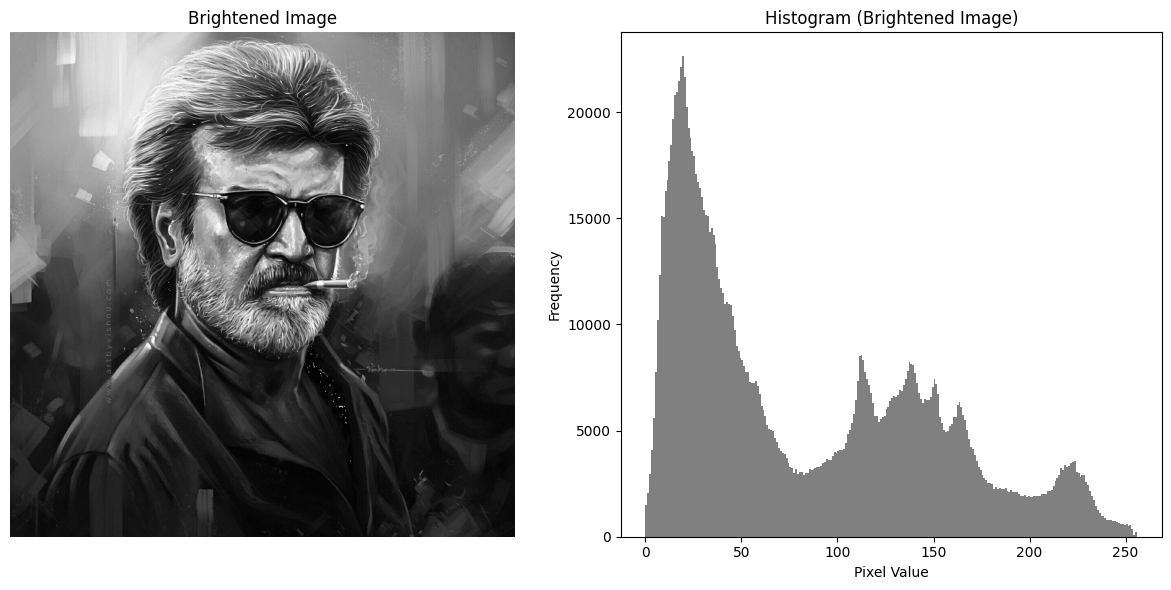

In [36]:
def adjust_brightness(image_gray, beta=50):

    brightened_image = np.zeros_like(image_gray)


    for i in range(image_gray.shape[0]):
        for j in range(image_gray.shape[1]):
       
            new_value = image_gray[i, j] + beta

            if new_value > 255:
                brightened_image[i, j] = 255
            elif new_value < 0:
                brightened_image[i, j] = 0
            else:
                brightened_image[i, j] = new_value

    return brightened_image

brightened_image = adjust_brightness(image_gray, beta=255)
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(brightened_image, cmap='gray')
plt.title('Brightened Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(brightened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Brightened Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Contrast ##

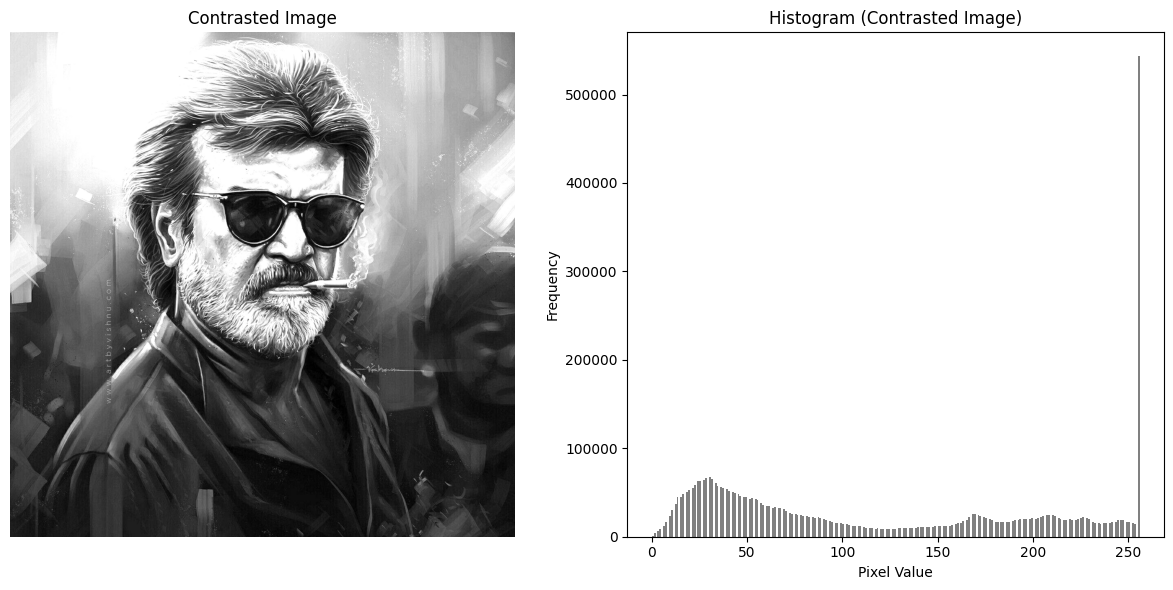

In [37]:
def adjust_contrast(image_gray, alpha=1.5, beta=0):
    contrasted_image = np.zeros_like(image)

  
    for i in range(image_gray.shape[0]):
        for j in range(image_gray.shape[1]):
           
            new_value = alpha * image_gray[i, j] + beta

          
            if new_value > 255:
                contrasted_image[i, j] = 255
            elif new_value < 0:
                contrasted_image[i, j] = 0
            else:
                contrasted_image[i, j] = new_value

    return contrasted_image

contrasted_image = adjust_contrast(image_gray, alpha=1.5, beta=0)
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(contrasted_image, cmap='gray')
plt.title('Contrasted Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(contrasted_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Contrasted Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


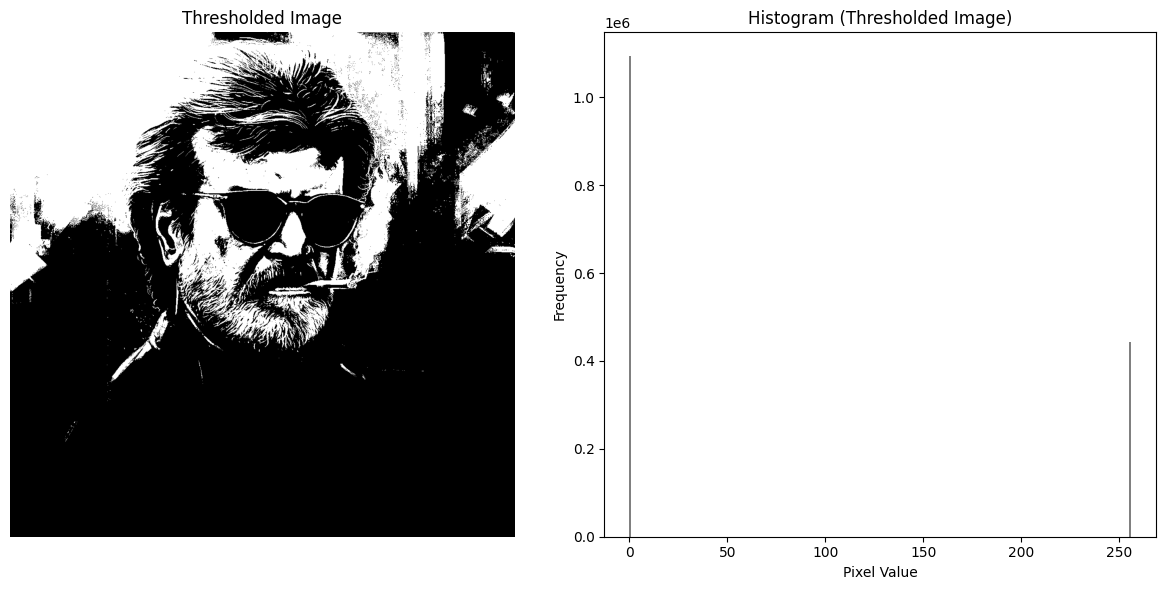

In [38]:

def threshold_image(image_gray, thresh_value=128):
    thresholded_img = np.zeros_like(image_gray)
    thresholded_img[image_gray > thresh_value] = 255
    return thresholded_img
thresholded_image = threshold_image(image_gray)
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(thresholded_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Thresholded Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


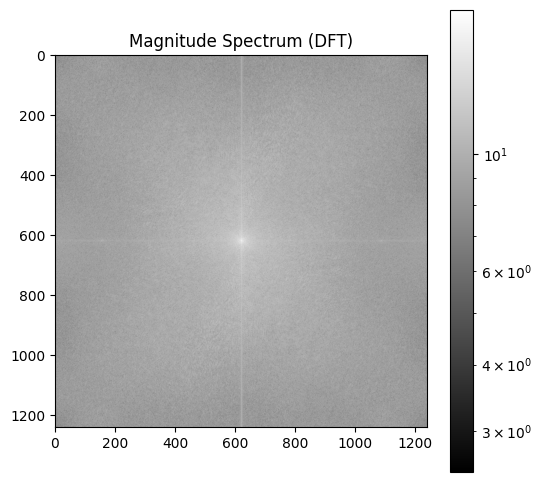

In [10]:
def plot_dft(image_gray):
    dft = np.fft.fft2(image_gray)
    dft_shift = np.fft.fftshift(dft) 
    magnitude_spectrum = np.abs(dft_shift)
    magnitude_spectrum_log = np.log(magnitude_spectrum + 1)
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude_spectrum_log, cmap='gray', norm=LogNorm())
    plt.title('Magnitude Spectrum (DFT)')
    plt.colorbar()
    plt.show() 

plot_dft(image_gray)


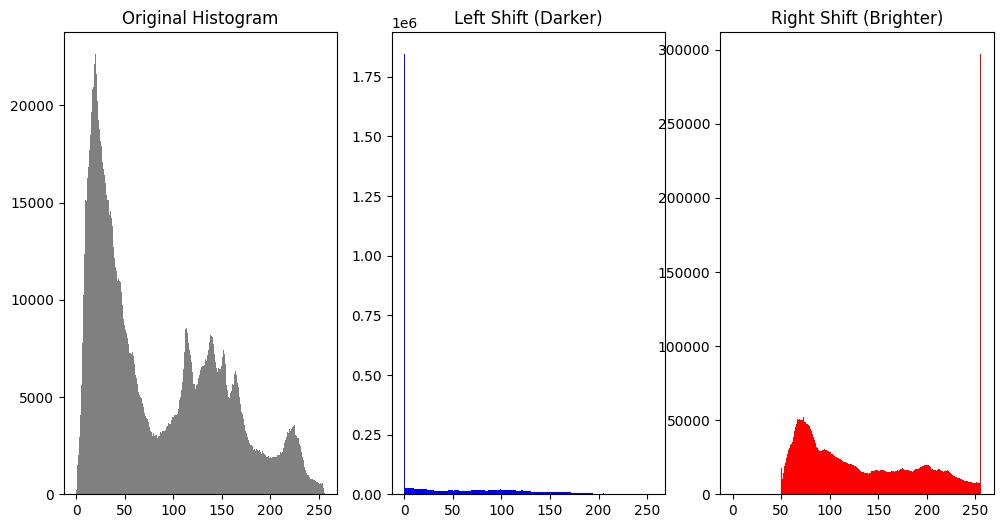

In [14]:
def shift_histogram(image_gray, shift_value):
    image = image_gray.astype(np.int16)  
    shifted_image = np.clip(image + shift_value, 0, 255).astype(np.uint8)
    return shifted_image
left_shifted = shift_histogram(image, -50)   
right_shifted = shift_histogram(image, 50)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Original Histogram")

plt.subplot(1, 3, 2)
plt.hist(left_shifted.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Left Shift")

plt.subplot(1, 3, 3)
plt.hist(right_shifted.ravel(), bins=256, range=[0, 256], color='red')
plt.title("Right Shift")

plt.show()

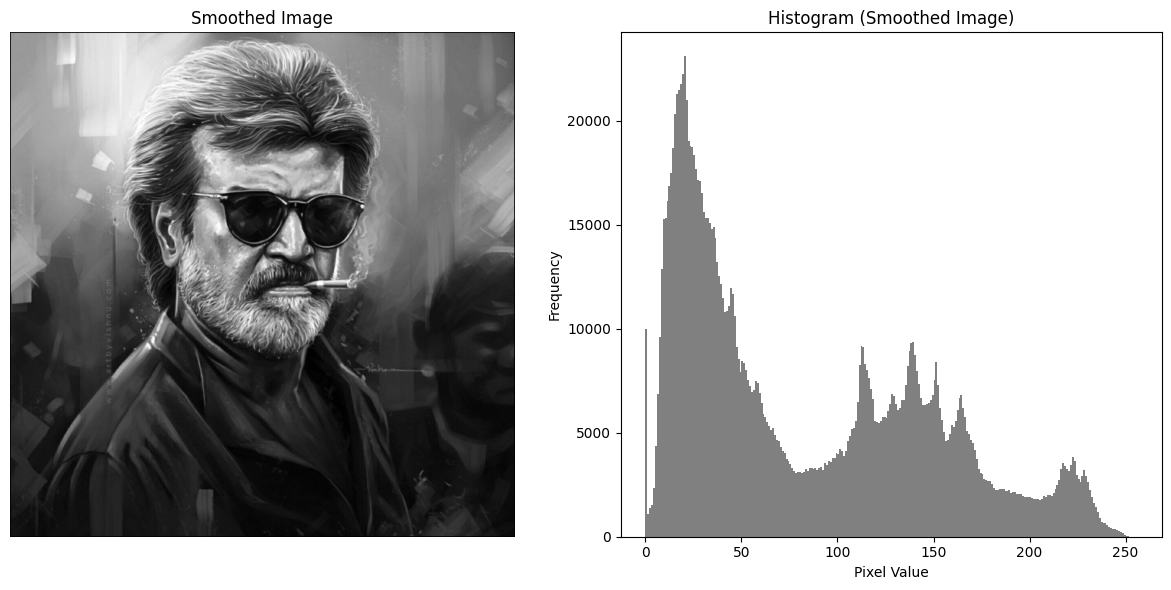

In [24]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(- ((x - (size-1)//2)**2 + (y - (size-1)//2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)
kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)
smoothed_image = np.zeros_like(image_gray)
for i in range(2, image_gray.shape[0] - 2):
    for j in range(2, image_gray.shape[1] - 2):
        region = image_gray[i-2:i+3, j-2:j+3]
        smoothed_image[i, j] = np.sum(region * kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.hist(smoothed_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Smoothed Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

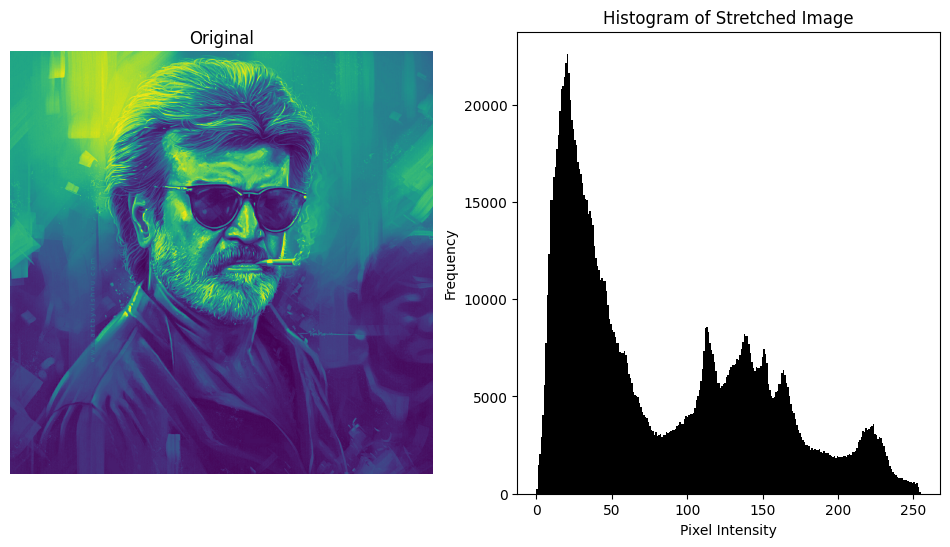

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_stretch(image_gray):
    min_pixel = np.min(image_gray)
    max_pixel = np.max(image_gray)
    
    stretched = ((image_gray - min_pixel) / (max_pixel - min_pixel) * 255).astype(np.uint8)
    
    return stretched

# Assuming image_gray is already defined as a NumPy array
stretched_image = histogram_stretch(image_gray)

# Plot the histogram of the stretched image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray)
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.hist(stretched_image.ravel(), bins=256, color='black')  # Use plt.hist instead of plt.histplot
plt.title("Histogram of Stretched Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
